## Load the dataset into the Python environment:

In [11]:
import pandas as pd
# Read the dataset
dataset = pd.read_csv('C:/Users/acer/Downloads/Wineclust.csv')


## Perform necessary pre-processing steps (if required):

In [12]:
dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [14]:
# Separate the features from the dataset (if required)
X = dataset.drop(columns=['Alcohol', 'Malic_Acid']) # Select relevant columns for clustering

## Find the optimum number of clusters and create the model with the optimum number of clusters for each clustering algorithm:

C:\Users\acer\anaconda3\envs\ICT_Learning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\acer\anaconda3\envs\ICT_Learning\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\acer\anaconda3\envs\ICT_Learning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\acer\anaconda3\envs\ICT_Learning\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chun

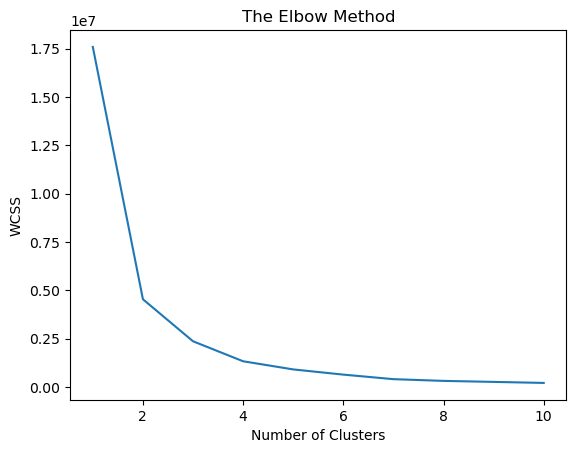

In [28]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Finding the optimum number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [18]:
# Create the K-means model with the optimum number of clusters
k = 3 # Select the optimum number of clusters based on the Elbow method
kmeans_model = KMeans(n_clusters=k, init='k-means++', random_state=42)
kmeans_model.fit(X)

C:\Users\acer\anaconda3\envs\ICT_Learning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\acer\anaconda3\envs\ICT_Learning\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

C:\Users\acer\anaconda3\envs\ICT_Learning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\acer\anaconda3\envs\ICT_Learning\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


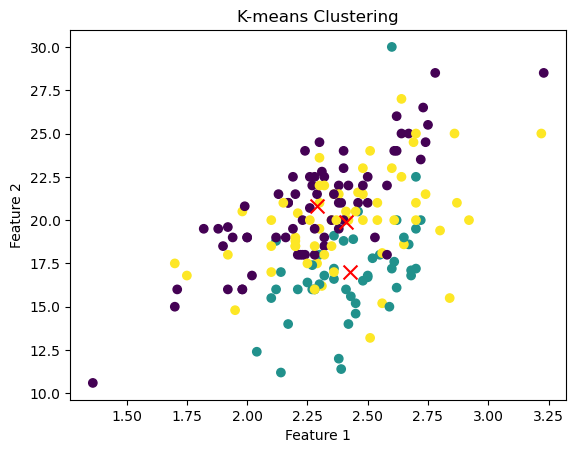

In [21]:
kmeans_labels = kmeans_model.fit_predict(X)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=kmeans_labels, cmap='viridis')
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], marker='x', color='r', s=100)
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [22]:
## For Agglomerative clustering:


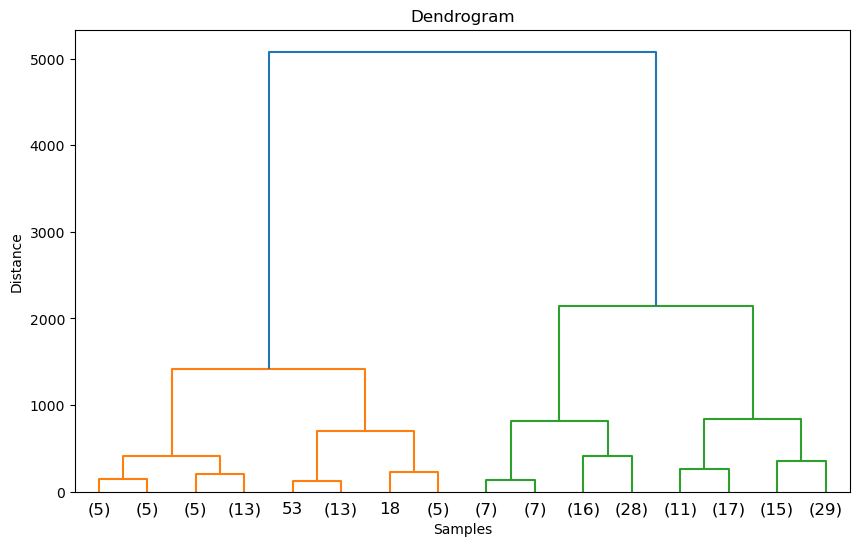

In [23]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering and plot the dendrogram
linked = linkage(X, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='level', p=3)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [24]:
# Create the Agglomerative model with the optimum number of clusters
k = 3 # Select the optimum number of clusters based on the dendrogram
agglomerative_model = AgglomerativeClustering(n_clusters=k,affinity='euclidean', linkage='ward')
agglomerative_model.fit(X)

C:\Users\acer\anaconda3\envs\ICT_Learning\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', n_clusters=3)

C:\Users\acer\anaconda3\envs\ICT_Learning\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


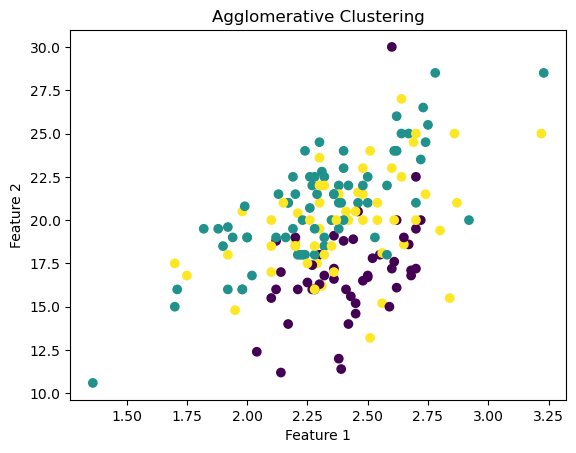

In [25]:
agglomerative_labels = agglomerative_model.fit_predict(X)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=agglomerative_labels, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Learn about DBSCAN clustering and implement it:

In [26]:
from sklearn.cluster import DBSCAN

# Create the DBSCAN model
dbscan_model = DBSCAN(eps=0.5, min_samples=5)
dbscan_model.fit(X)

DBSCAN()

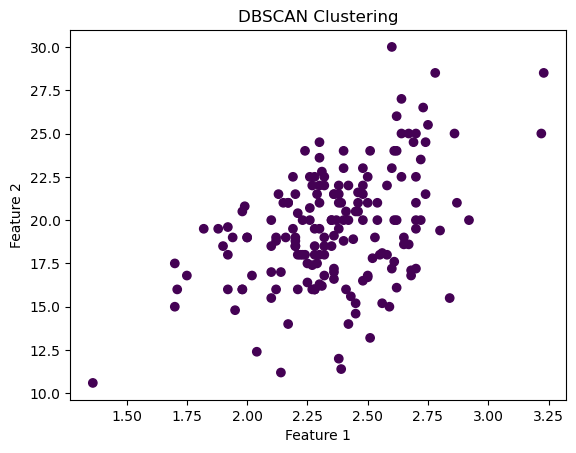

In [27]:
dbscan_labels = dbscan_model.fit_predict(X)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()